#### Step 1: Import Libraries

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
from IPython.display import Image
import os
from IPython.display import display
from PIL import Image as PILImage

#### Step 2: First stage of rCNN

Saved grid image: grid_0_0.jpg
Saved grid image: grid_0_1.jpg
Saved grid image: grid_1_0.jpg
Saved grid image: grid_1_1.jpg
Saved grid image: grid_2_0.jpg
Saved grid image: grid_2_2.jpg


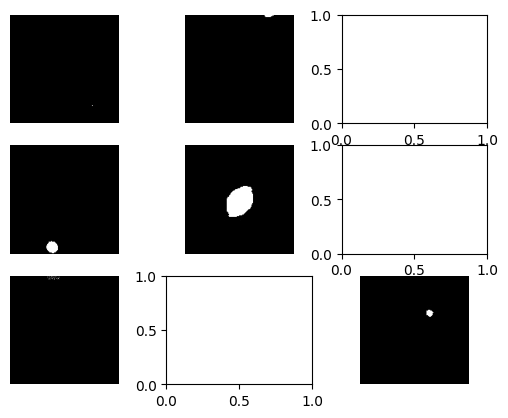

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("001.jpg", cv2.IMREAD_COLOR)

# Convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Determine the grid size (in this case, 3x3 grids)
grid_size = 3

# Calculate the dimensions of each grid
grid_height = img_gray.shape[0] // grid_size
grid_width = img_gray.shape[1] // grid_size

# Create a subplot for displaying the images
fig, axs = plt.subplots(grid_size, grid_size)

# Iterate over rows and columns to extract each grid
for i in range(grid_size):
    for j in range(grid_size):
        y_start = i * grid_height
        y_end = (i + 1) * grid_height
        x_start = j * grid_width
        x_end = (j + 1) * grid_width
        grid = img_gray[y_start:y_end, x_start:x_end]

        if np.any(grid < 255) and np.any(grid > 0):
            # Save the individual grid image if it contains black and white pixels
            grid_filename = f"grid_{i}_{j}.jpg"
            cv2.imwrite(grid_filename, grid)
            print(f"Saved grid image: {grid_filename}")
            
            # Display the grid image
            axs[i, j].imshow(grid, cmap='gray')
            axs[i, j].axis('off')

# Show the grid images
plt.show()


#### Step 3: Recursive CNN 1

Saved grid image: grid_0_0.jpg
Saved grid image: grid_0_1.jpg
Saved grid image: grid_0_2.jpg
Saved grid image: grid_1_0.jpg
Saved grid image: grid_1_1.jpg
Saved grid image: grid_1_2.jpg
Saved grid image: grid_2_0.jpg
Saved grid image: grid_2_1.jpg
Saved grid image: grid_2_2.jpg


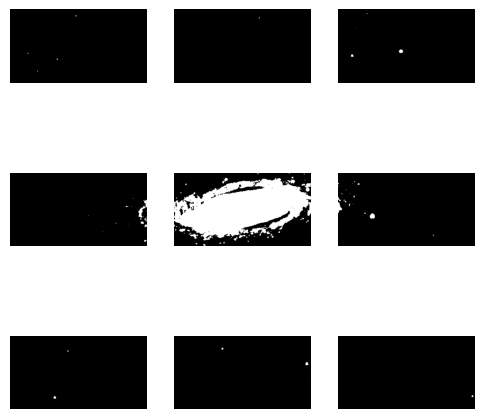

In [3]:
# Load the original image
img = cv2.imread("005.jpg", cv2.IMREAD_COLOR)

# Initialize a flag to check if there's white in the corners
white_in_corners = False

# Define the corner pixels
corner_pixels = [(0, 0), (img.shape[0] - 1, img.shape[1] - 1)]

previous_iteration = None

while not white_in_corners:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Determine the grid size (in this case, 3x3 grids)
    grid_size = 3

    # Calculate the dimensions of each grid
    grid_height = img_gray.shape[0] // grid_size
    grid_width = img_gray.shape[1] // grid_size

    # Flag to check if there's white in the current iteration
    white_in_iteration = False

    # Iterate over rows and columns to extract each grid
    for i in range(grid_size):
        for j in range(grid_size):
            y_start = i * grid_height
            y_end = (i + 1) * grid_height
            x_start = j * grid_width
            x_end = (j + 1) * grid_width
            grid = img_gray[y_start:y_end, x_start:x_end]

            if np.any(grid == 255):
                # Save the individual grid image if it contains white pixels
                grid_filename = f"grid_{i}_{j}.jpg"
                cv2.imwrite(grid_filename, grid)
                print(f"Saved grid image: {grid_filename}")
                white_in_iteration = True

    # If white found in this iteration, set white_in_corners to True
    if white_in_iteration:
        white_in_corners = True
    else:
        # If no white in this iteration, save the grids from the previous iteration
        if previous_iteration is not None:
            for i in range(grid_size):
                for j in range(grid_size):
                    y_start = i * grid_height
                    y_end = (i + 1) * grid_height
                    x_start = j * grid_width
                    x_end = (j + 1) * grid_width
                    grid = previous_iteration[y_start:y_end, x_start:x_end]

                    grid_filename = f"grid_{i}_{j}.jpg"
                    cv2.imwrite(grid_filename, grid)
                    print(f"Saved grid image from the previous iteration: {grid_filename}")
        previous_iteration = img_gray

# Display the individual grid images
fig, axes = plt.subplots(grid_size, grid_size, figsize=(6, 6))
for i in range(grid_size):
    for j in range(grid_size):
        y_start = i * grid_height
        y_end = (i + 1) * grid_height
        x_start = j * grid_width
        x_end = (j + 1) * grid_width
        grid = img_gray[y_start:y_end, x_start:x_end]

        if np.any(grid == 255):
            ax = axes[i, j]
            ax.imshow(grid, cmap='gray')
            ax.axis('off')

plt.show()

#### Step 4: Recursive CNN 2

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
img = cv2.imread("005.jpg", cv2.IMREAD_COLOR)

# Initialize a flag to check if there's white in the corners
white_in_corners = False

# Define the corner pixels
corner_pixels = [(0, 0), (img.shape[0] - 1, img.shape[1] - 1)]

highest_white_pixel_count = 0
best_grid = None

# Create lists to store grid images
grid_images = []

while not white_in_corners:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Determine the grid size (in this case, 3x3 grids)
    grid_size = 3

    # Calculate the dimensions of each grid
    grid_height = img_gray.shape[0] // grid_size
    grid_width = img_gray.shape[1] // grid_size

    # Iterate over rows and columns to extract each grid
    for i in range(grid_size):
        for j in range(grid_size):
            y_start = i * grid_height
            y_end = (i + 1) * grid_height
            x_start = j * grid_width
            x_end = (j + 1) * grid_width
            grid = img_gray[y_start:y_end, x_start:x_end]

            # Count the white pixels in the grid
            white_pixel_count = np.sum(grid == 255)

            if white_pixel_count > highest_white_pixel_count:
                highest_white_pixel_count = white_pixel_count
                best_grid = grid

            # Append the grid image to the list for display
            grid_images.append(grid)

    # Save the grid with the highest white pixel count
    if best_grid is not None:
        cv2.imwrite("best_grid.jpg", best_grid)
        print(f"Saved the grid with the highest white pixel count.")
        best_grid = None  # Reset the best grid
    else:
        break  # Terminate if no grid contains white pixels

    # If white found in this iteration, set white_in_corners to True
    if any(img_gray[y, x] == 255 for y, x in corner_pixels):
        white_in_corners = True



Saved the grid with the highest white pixel count.


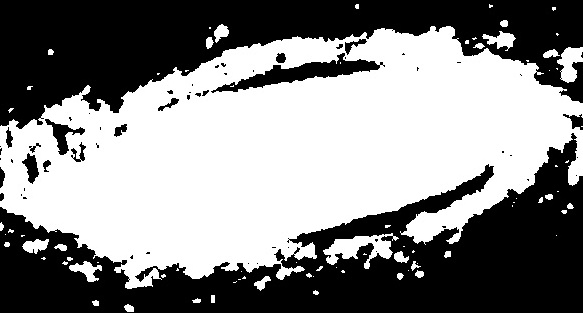

In [12]:
Image(filename='best_grid.jpg')